In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

x = house_df['sqft_living'].values.reshape(-1, 1)[:1000]
y = house_df['price'].values.reshape(-1,1 )[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

#Hint: .fit()

LinearRegression()

Mean squared error equals: 57951541552.54621


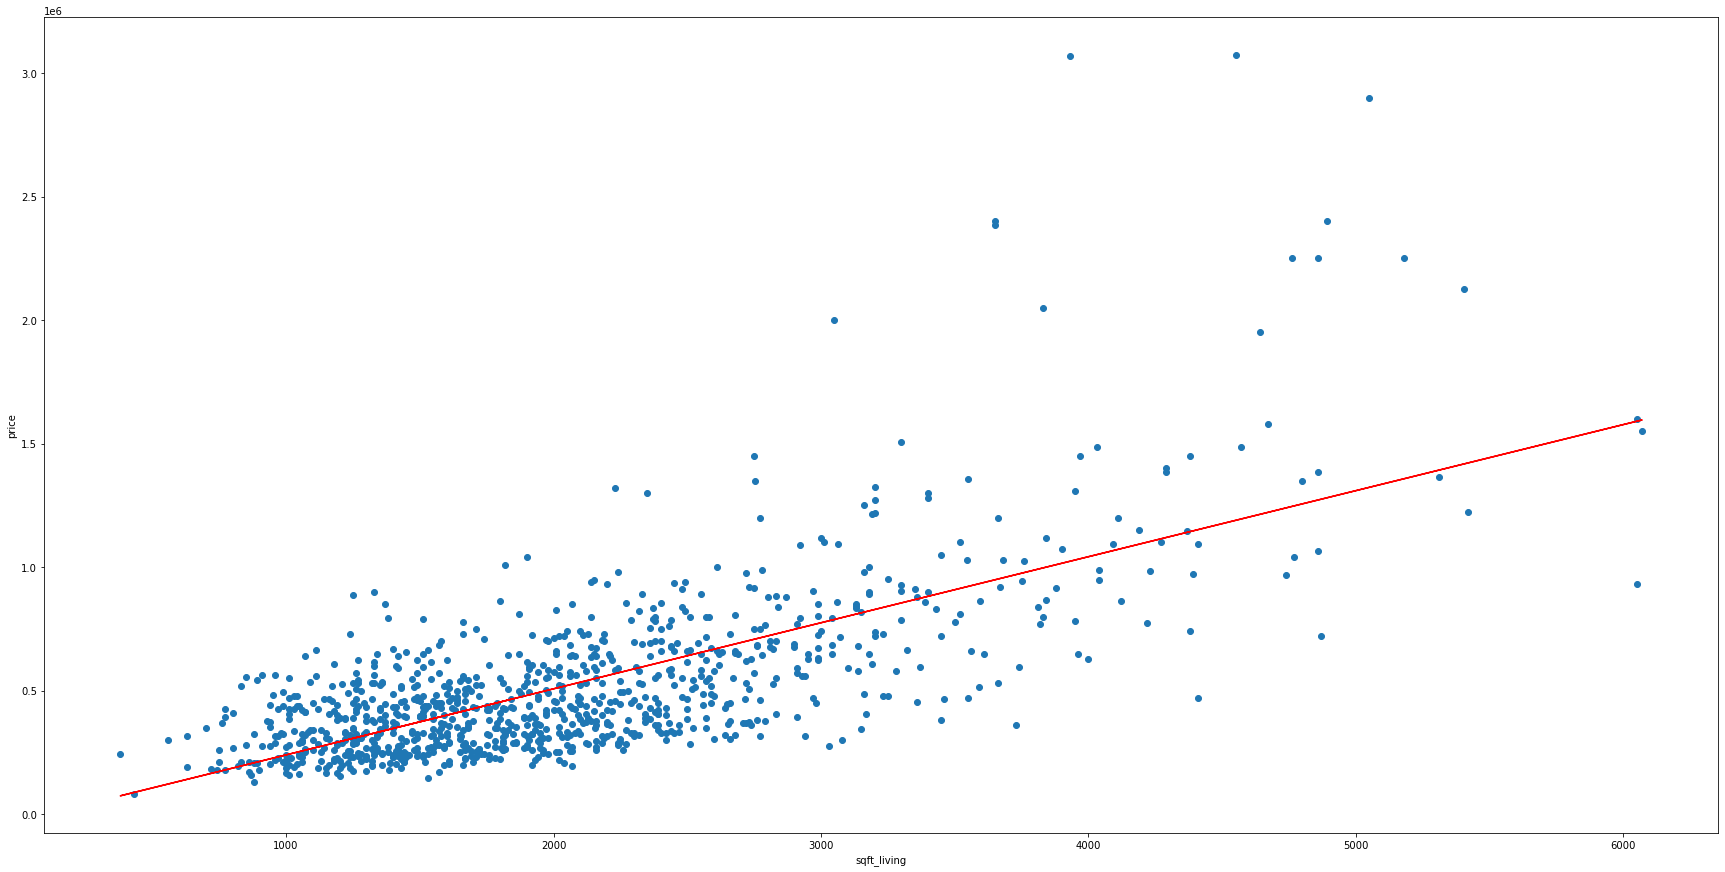

In [3]:
#b)

#Your code:

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.plot(x, (x * model.coef_ + model.intercept_),"r")
plt.scatter(x,y)
print('Mean squared error equals:',mean_squared_error(y, (x*model.coef_+model.intercept_)))

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

> NOTE: In the chart, we can see quite blurred data, probably resulting from the fact that a larger apartment is not always a more expensive apartment. Simple regression, so it's quite complicated to fit well, because there are a lot of 'big errors'. Based on the sklearn library, it is plotted as close as possible to all points on average

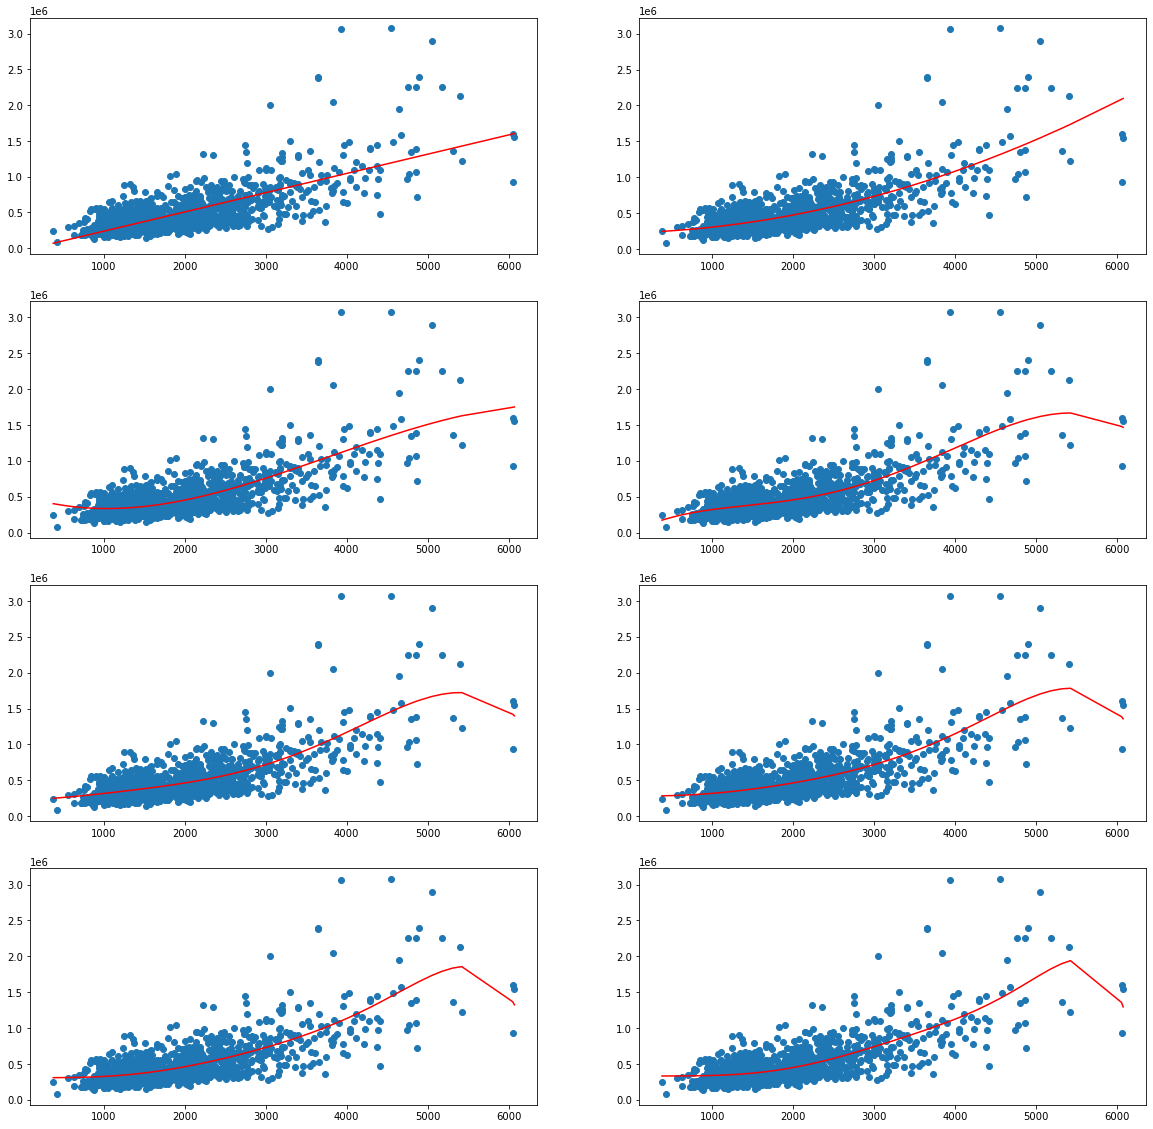

In [4]:
#c)

mean = []
mean2 = []
mean3 = []

fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for order in range(1,9):
    
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (x)
    model.fit (X_order,y)
    y_pred = model.predict (X_order)
    
    if order % 2 == 1:
        l = []
        for X in x:
            l.append (X[0])
        u = []
        for Y in y_pred:
            u.append (Y[0])
        Z = [i for _, i in sorted (zip (l,u))]    
        l.sort()
        axs[round (((order-1)/2)-0.1),0].scatter (x,y)
        axs[round (((order-1)/2)-0.1),0].plot (l,Z, color="red")
        mean.append (mean_squared_error (y, y_pred))
    else:
        l = []
        for X in x:
            l.append(X[0])
        u = []
        for Y in y_pred:
            u.append(Y[0])
        Z = [i for _, i in sorted (zip (l,u))]
        l.sort()
        axs[round (((order-1)/2)-0.1),1].scatter(x,y)
        axs[round (((order-1)/2)-0.1),1].plot(l,Z, color="red")
        mean.append(mean_squared_error (y, y_pred))


> NOTE: In this subsection, we modify our curves, creating polynomials from them, which fit the data better, because they have inflection points, they can change their course in a given place. The higher the degree of the polynomial, the smaller the error we expect.

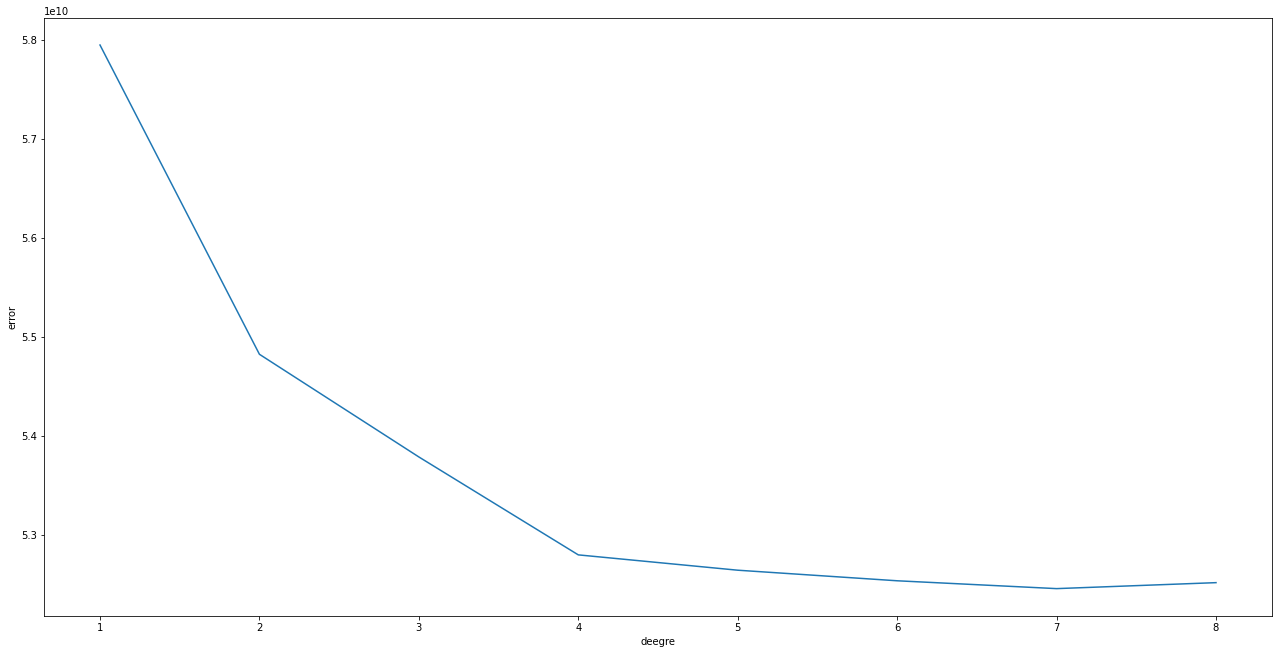

In [5]:
#Your code:

degree=[1,2,3,4,5,6,7,8]
f = plt.figure ()
f.set_figwidth (22)
f.set_figheight (11)
plt.xlabel ("deegre")
plt.ylabel ("error")
plt.plot (degree,mean)

> NOTE: Here we have a graph that shows us the average error, depending on the degree of the polynomial. We see what was mentioned earlier, that the higher the degree of the polynomial, the better it fits to the points on the graph. However, it has its limits, which can be seen from the flattening at the end

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

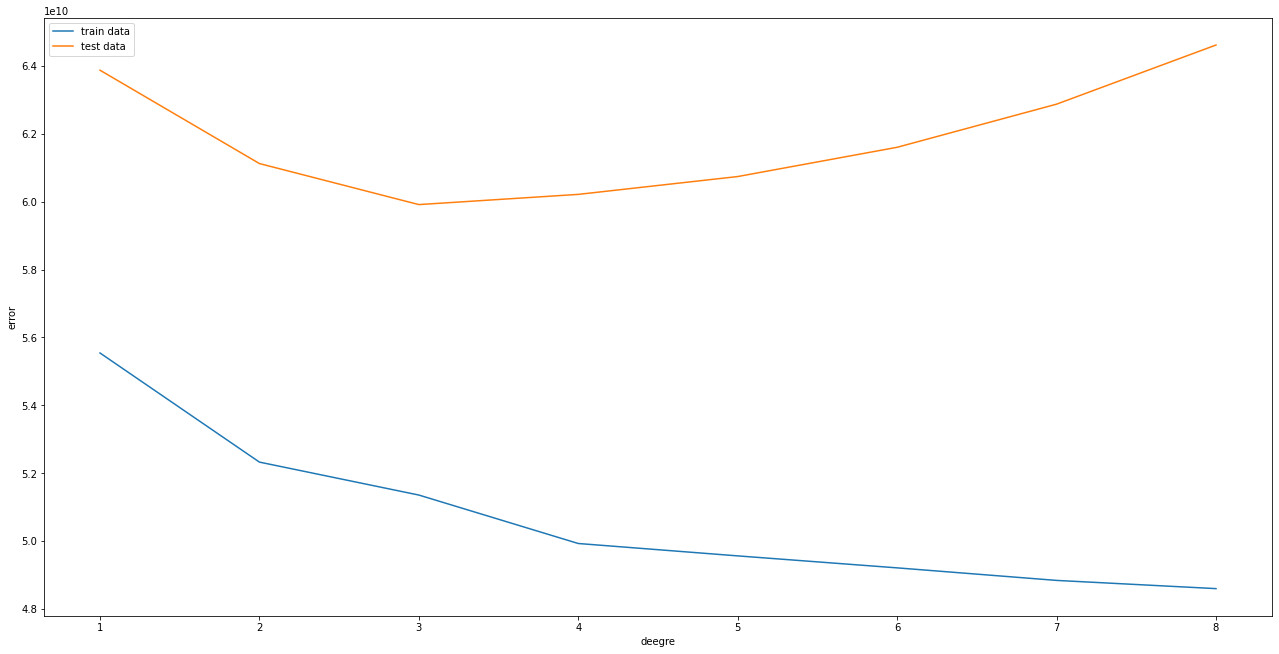

In [6]:
#a)

for order in range (1,9):
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (x)
    
    X_train, X_test, y_train, y_test = train_test_split (X_order, y, test_size=0.3, random_state=44)
    
    model.fit (X_train,y_train)
    model2 = LinearRegression ()
    model2.fit (X_test,y_test)
    y_pred = model.predict (X_train)
    y2_pred = model.predict (X_test)
    mean2.append (mean_squared_error (y_train,y_pred))
    mean3.append (mean_squared_error (y_test,y2_pred))
    
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(11)

plt.xlabel("deegre")
plt.ylabel("error")
plt.plot(degree,mean2,label="train data")
plt.plot(degree,mean3,label="test data")
plt.legend(loc="upper left")

> NOTE: The next step was to separate the train and test data and compare their errors. We can see that train data has quite a significant advantage in accuracy. Interestingly, the test data at some point increases, even though the theory would say otherwise. Recall that the split function divides the data into given parts. So it can be easily concluded that the test data received some data that is harder to fit to any curve

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

1069.80475795355
[0.00187103]
Mean squared error equals: 396554.4716066867


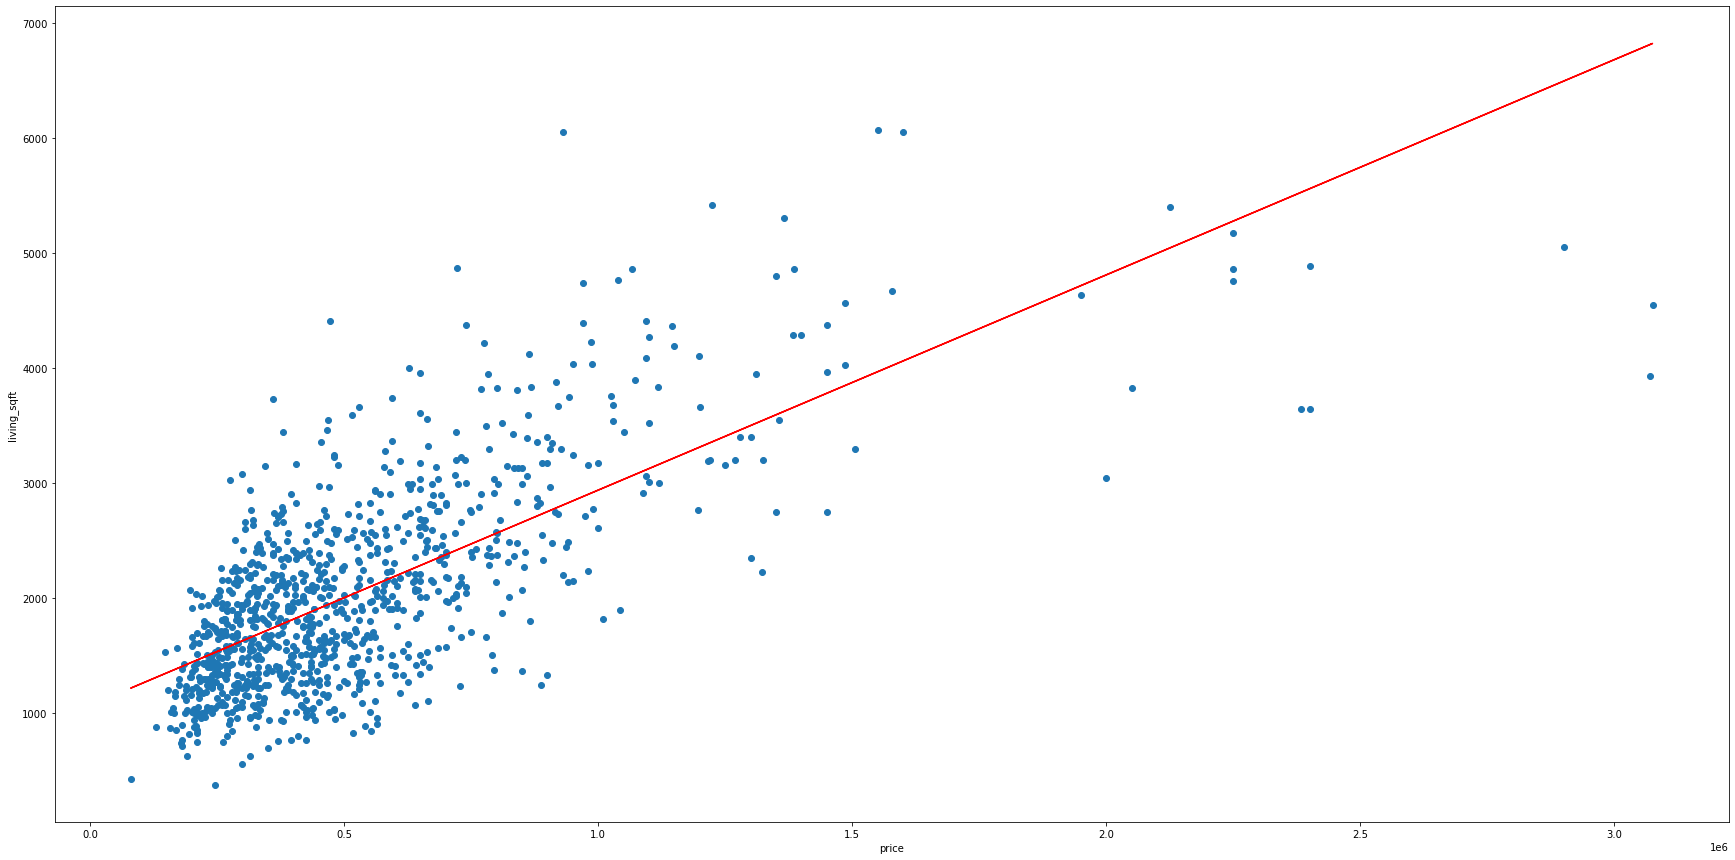

In [7]:
#a)

x = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.xlabel("price")
plt.ylabel("living_sqft")
plt.plot(x,(x*model.coef_+model.intercept_),"r")
plt.scatter(x,y)
g = mean_squared_error(y, (x*model.coef_+model.intercept_))
print('Mean squared error equals:', g)

> NOTE: In this case, we swap the data axes, which gives us differently arranged data, and thus a different regression line, thanks to which we can better predict other data, in this case the price of the apartment.

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48750124365.43103


In [9]:
#Your model:

# Method 1

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

for order in range(1,4):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.5, random_state=43)
    model.fit(X_order,y)
    y_pred = model.predict(X_order)
print("Mean squared error equals: {0}".format(mean_squared_error(y, y_pred)))

Mean squared error equals: 46862907065.624176


> NOTE: In this case, we changed the procedure a bit, because we iterate over each degree of the polynomial instead of doing everything in one step. This makes our error decrease by about 5%

In [10]:
# Method 2

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 42662829788.069595


> NOTE: the second way to slightly reduce the error (about 14%) is simply to change the parameters of data division. More specifically, it's about the ratio of test_size from 0.5 to 0.1 and random_state from 43 to 40.

In [11]:
# Method 3

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

for order in range(1,4):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.5, random_state=43)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    
print("Mean squared error equals: {0}".format(mean_squared_error(y_train, y_pred)))

Mean squared error equals: 45677675880.801346


> NOTE: The last solution is to change the compared data. We're not using pure data here, but y_train data that we're comparing with those predicted by the functions. In this case, we get a slightly better result compared to method 1